In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress

: 

In [ ]:
# Import data
path_point_loma_csv = "wind_to_wastewater/wind_to_wastewater_Point_loma.csv"
path_encina_csv = "wind_to_wastewater/wind_to_wastewater_Encina.csv"
path_south_bay = "wind_to_wastewater/wind_to_wastewater_South_Bay.csv"

df_point_loma = pd.read_csv(path_point_loma_csv)
df_encina = pd.read_csv(path_encina_csv)
df_south_bay = pd.read_csv(path_south_bay)

print(df_point_loma.columns)

Index(['Date', 'avg_wind_speed_m_s', 'Mean viral gene copies/L', 'smoothed',
       'zscore', 'Mean viral gene copies/ML'],
      dtype='object')


In [23]:
# Add column to convert Viral Gene Copies /L -> /ML
df_point_loma["Mean VGC /ML"] = df_point_loma["Mean viral gene copies/L"] / 1e6
df_encina["Mean VGC /ML"] = df_point_loma["Mean viral gene copies/L"] / 1e6
df_south_bay["Mean VGC /ML"] = df_point_loma["Mean viral gene copies/L"] / 1e6

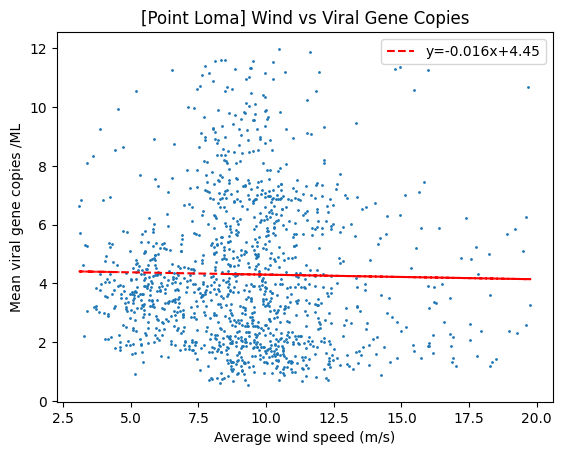

In [ ]:
# Scatter plot
# x = df_point_loma['avg_wind_speed_m_s']
# y = df_point_loma['Mean viral gene copies/L']

# Remove outliers (y>1.2e7, x>20)
cond1 = df_point_loma['avg_wind_speed_m_s'] < 20
cond2 = df_point_loma['Mean VGC /ML'] < 12

df_filtered = df_point_loma[cond1 & cond2]
x = df_filtered['avg_wind_speed_m_s']
y = df_filtered['Mean VGC /ML']

# Trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--', label=f"y={z[0]:.3f}x+{z[1]:.2f}")
plt.legend(loc='upper right', frameon=True, fancybox=True)

plt.scatter(x, y, s=1)
plt.xlabel("Average wind speed (m/s)")
plt.ylabel("Mean viral gene copies /ML")
plt.title("[Point Loma] Wind vs Viral Gene Copies")
plt.show()

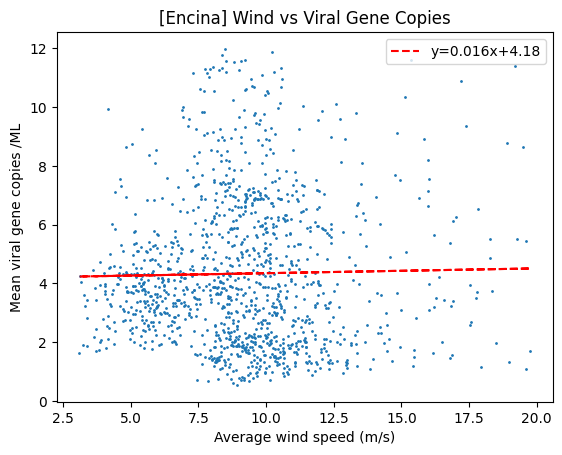

In [ ]:
# Scatter plot
# x = df_point_loma['avg_wind_speed_m_s']
# y = df_point_loma['Mean viral gene copies/L']

# Remove outliers (y>1.2e7, x>20)
cond1 = df_encina['avg_wind_speed_m_s'] < 20
cond2 = df_encina['Mean VGC /ML'] < 12

df_filtered = df_encina[cond1 & cond2]
x = df_filtered['avg_wind_speed_m_s']
y = df_filtered['Mean VGC /ML']

# Trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--', label=f"y={z[0]:.3f}x+{z[1]:.2f}")
plt.legend(loc='upper right', frameon=True, fancybox=True)

plt.scatter(x, y, s=1)
plt.xlabel("Average wind speed (m/s)")
plt.ylabel("Mean viral gene copies /ML")
plt.title("[Encina] Wind vs Viral Gene Copies")
plt.show()

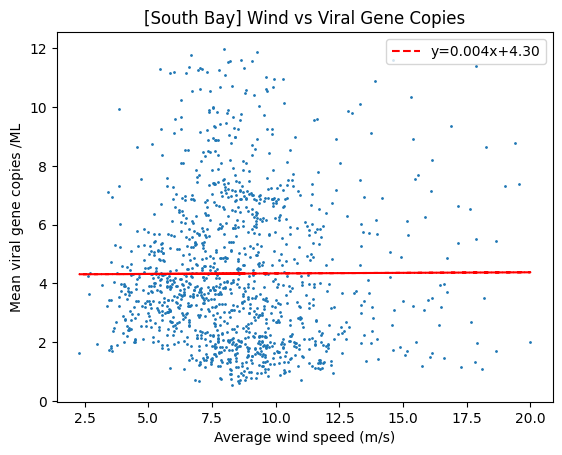

In [41]:
# Scatter plot
# x = df_point_loma['avg_wind_speed_m_s']
# y = df_point_loma['Mean viral gene copies/L']

# Remove outliers (y>1.2e7, x>20)
cond1 = df_south_bay['avg_wind_speed_m_s'] < 20
cond2 = df_south_bay['Mean VGC /ML'] < 12

df_filtered = df_south_bay[cond1 & cond2]
x = df_filtered['avg_wind_speed_m_s']
y = df_filtered['Mean VGC /ML']

# Trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--', label=f"y={z[0]:.3f}x+{z[1]:.2f}")
plt.legend(loc='upper right', frameon=True, fancybox=True)

plt.scatter(x, y, s=1)
plt.xlabel("Average wind speed (m/s)")
plt.ylabel("Mean viral gene copies /ML")
plt.title("[South Bay] Wind vs Viral Gene Copies")
plt.show()

Max delay is at D 10, at slope -0.025679835784540576
-0.011928565936502024 4.381078717883443


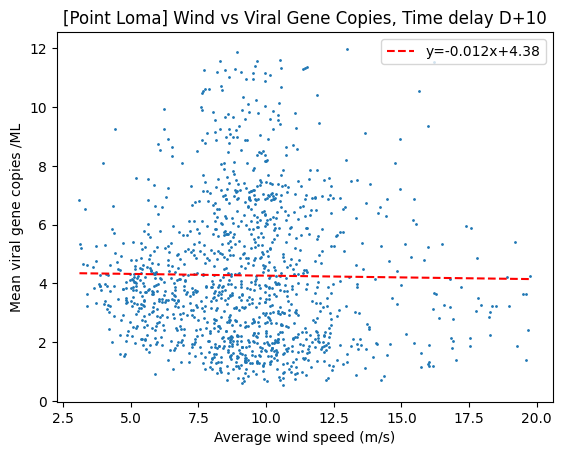

In [89]:

# Remove outliers (y>1.2e7, x>20)
cond1 = df_point_loma['avg_wind_speed_m_s'] < 20
cond2 = df_point_loma['Mean VGC /ML'] < 12

df_filtered = df_point_loma[cond1 & cond2]

# Calculate time delay with largest slope for Encina, D-1 ~ 29
max_slope = 0
max_delay = 0
for day in range(-28, 29):
    if day > 0:
        x = df_filtered['avg_wind_speed_m_s'][day:]
        y = df_filtered['Mean VGC /ML'][day:]
    elif day < 0:
        x = df_filtered['avg_wind_speed_m_s'][-day:]
        y = df_filtered['Mean VGC /ML'][:day]
    else:
        x = df_filtered['avg_wind_speed_m_s']
        y = df_filtered['Mean VGC /ML']

    slope, intercept, _, _, _ = linregress(x, y)
    # print(f"Day {day}: y = {slope}x + {intercept}")

    if abs(slope) > abs(max_slope):
        max_slope = slope
        max_delay = day
print(f"Max delay is at D {max_delay}, at slope {max_slope}")

# Adjust by time delay
df_filtered2 = pd.DataFrame()
if max_delay > 0:
    x = df_filtered['avg_wind_speed_m_s'][:-max_delay]
    y = df_filtered['Mean VGC /ML'][max_delay:]
elif max_delay < 0:
    x = df_filtered['avg_wind_speed_m_s'][-max_delay:]
    y = df_filtered['Mean VGC /ML'][:max_delay]
else:
    x = df_filtered['avg_wind_speed_m_s']
    y = df_filtered['Mean VGC /ML']

# Trend line
slope, intercept, _, _, _ = linregress(x, y)
line_x = np.array([min(x), max(x)])
line_y = slope * line_x + intercept
print(slope, intercept)
plt.plot(line_x, line_y, 'r--', label=f"y={slope:.3f}x+{intercept:.2f}")
plt.legend(loc='upper right', frameon=True, fancybox=True)

plt.scatter(x, y, s=1)
plt.xlabel("Average wind speed (m/s)")
plt.ylabel("Mean viral gene copies /ML")
plt.title(f"[Point Loma] Wind vs Viral Gene Copies, Time delay D{max_delay}" if max_delay < 0 else f"[Point Loma] Wind vs Viral Gene Copies, Time delay D+{max_delay}")
plt.show()

Max delay is at D -18, at slope 0.04616624405108878
0.04616624405108878 3.9084495156399717


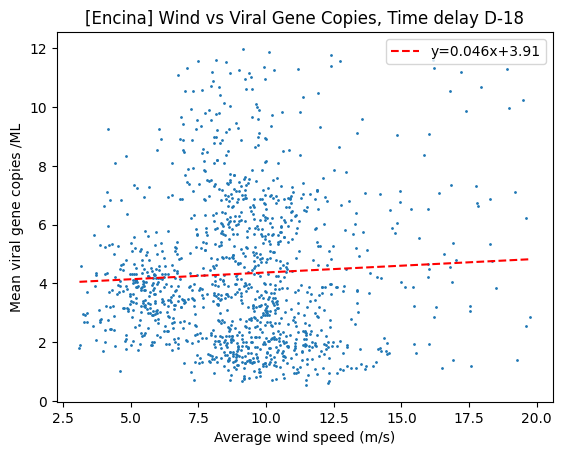

In [85]:

# Remove outliers (y>1.2e7, x>20)
cond1 = df_encina['avg_wind_speed_m_s'] < 20
cond2 = df_encina['Mean VGC /ML'] < 12

df_filtered = df_encina[cond1 & cond2]

# Calculate time delay with largest slope for Encina, D-1 ~ 29
max_slope = 0
max_delay = 0
for day in range(-28, 29):
    if day > 0:
        x = df_filtered['avg_wind_speed_m_s'][day:]
        y = df_filtered['Mean VGC /ML'][day:]
    elif day < 0:
        x = df_filtered['avg_wind_speed_m_s'][-day:]
        y = df_filtered['Mean VGC /ML'][:day]
    else:
        x = df_filtered['avg_wind_speed_m_s']
        y = df_filtered['Mean VGC /ML']

    slope, intercept, _, _, _ = linregress(x, y)
    # print(f"Day {day}: y = {slope}x + {intercept}")

    if abs(slope) > abs(max_slope):
        max_slope = slope
        max_delay = day
print(f"Max delay is at D {max_delay}, at slope {max_slope}")

# Adjust by time delay
df_filtered2 = pd.DataFrame()
if max_delay > 0:
    x = df_filtered['avg_wind_speed_m_s'][:-max_delay]
    y = df_filtered['Mean VGC /ML'][max_delay:]
elif max_delay < 0:
    x = df_filtered['avg_wind_speed_m_s'][-max_delay:]
    y = df_filtered['Mean VGC /ML'][:max_delay]
else:
    x = df_filtered['avg_wind_speed_m_s']
    y = df_filtered['Mean VGC /ML']

# Trend line
slope, intercept, _, _, _ = linregress(x, y)
line_x = np.array([min(x), max(x)])
line_y = slope * line_x + intercept
print(slope, intercept)
plt.plot(line_x, line_y, 'r--', label=f"y={slope:.3f}x+{intercept:.2f}")
plt.legend(loc='upper right', frameon=True, fancybox=True)

plt.scatter(x, y, s=1)
plt.xlabel("Average wind speed (m/s)")
plt.ylabel("Mean viral gene copies /ML")
plt.title(f"[Encina] Wind vs Viral Gene Copies, Time delay D{max_delay}")
plt.show()

Max delay is at D -23, at slope -0.03079350282805016
-0.03079350282805016 4.594234541449987


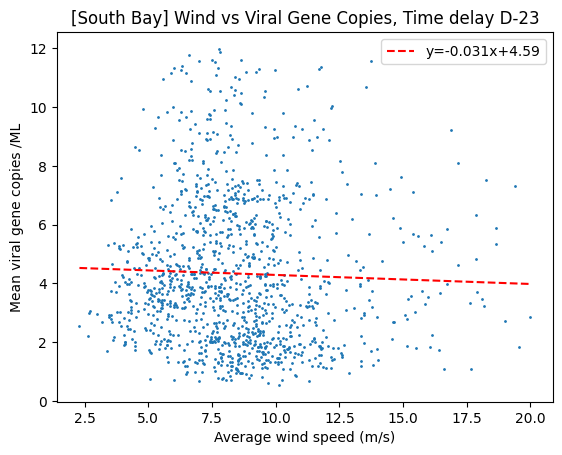

In [84]:

# Remove outliers (y>1.2e7, x>20)
cond1 = df_south_bay['avg_wind_speed_m_s'] < 20
cond2 = df_south_bay['Mean VGC /ML'] < 12
cond3 = np.isfinite(df_south_bay['avg_wind_speed_m_s'])
cond4 = np.isfinite(df_south_bay['Mean VGC /ML'])

df_filtered = df_south_bay[cond1 & cond2 & cond3 & cond4]

# Calculate time delay with largest slope for Encina, D-1 ~ 29
max_slope = 0
max_delay = 0
for day in range(-28, 29):
    if day > 0:
        x = df_filtered['avg_wind_speed_m_s'][day:]
        y = df_filtered['Mean VGC /ML'][day:]
    elif day < 0:
        x = df_filtered['avg_wind_speed_m_s'][-day:]
        y = df_filtered['Mean VGC /ML'][:day]
    else:
        x = df_filtered['avg_wind_speed_m_s']
        y = df_filtered['Mean VGC /ML']

    slope, intercept, _, _, _ = linregress(x, y)
    # print(f"Day {day}: y = {slope}x + {intercept}")

    if abs(slope) > abs(max_slope):
        max_slope = slope
        max_delay = day
print(f"Max delay is at D {max_delay}, at slope {max_slope}")

# Adjust by time delay
df_filtered2 = pd.DataFrame()
if max_delay > 0:
    x = df_filtered['avg_wind_speed_m_s'][:-max_delay]
    y = df_filtered['Mean VGC /ML'][max_delay:]
elif max_delay < 0:
    x = df_filtered['avg_wind_speed_m_s'][-max_delay:]
    y = df_filtered['Mean VGC /ML'][:max_delay]
else:
    x = df_filtered['avg_wind_speed_m_s']
    y = df_filtered['Mean VGC /ML']

# Trend line
slope, intercept, _, _, _ = linregress(x, y)
line_x = np.array([min(x), max(x)])
line_y = slope * line_x + intercept
print(slope, intercept)
plt.plot(line_x, line_y, 'r--', label=f"y={slope:.3f}x+{intercept:.2f}")
plt.legend(loc='upper right', frameon=True, fancybox=True)

plt.scatter(x, y, s=1)
plt.xlabel("Average wind speed (m/s)")
plt.ylabel("Mean viral gene copies /ML")
plt.title(f"[South Bay] Wind vs Viral Gene Copies, Time delay D{max_delay}")
plt.show()